# Preprocessing

## Setup - Load Libraries and Data

In [68]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [69]:
# Load data
ames_raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)

## Overview of Data

In [70]:
# Show columns
print(ames_raw.columns)

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [71]:
# Shape of the dataset
ames_raw.shape

(2580, 81)

In [72]:
# Datatypes, missing values, etc.
ames_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [73]:
# First few rows
ames_raw.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [74]:
# Categorize columns by data type
numeric_cols = ames_raw.select_dtypes(include=[np.number]).columns
categorical_cols = ames_raw.select_dtypes(include=[object]).columns

# Check by summing number of numeric and categorical columns
print(len(numeric_cols) + len(categorical_cols) == ames_raw.shape[1])

True


In [75]:
# Print the numeric columns
print(numeric_cols)

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


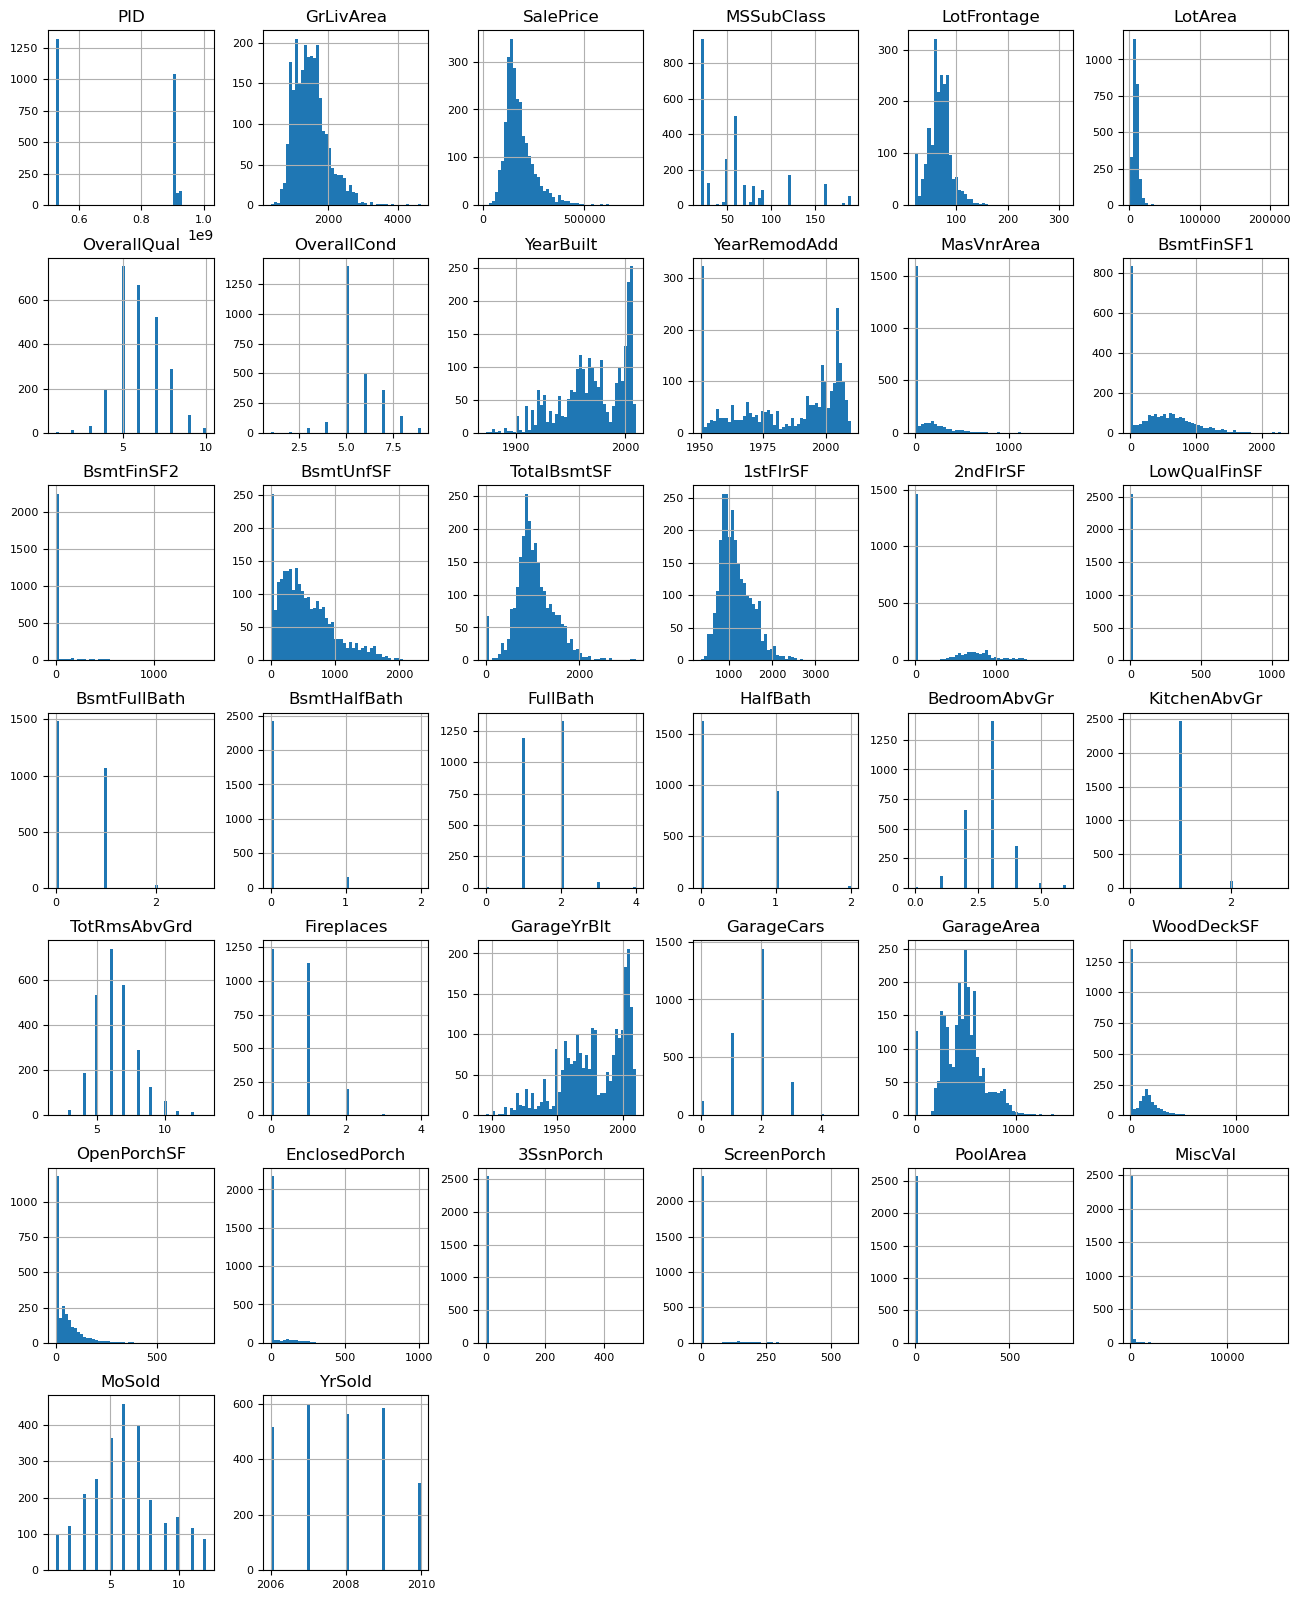

In [76]:
# Plot hists of numeric columns
ames_raw[numeric_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

One of the issues we see here is that some of these numeric categories are really ordinal categorical columns

In [77]:
# Print the categorical columns
print(categorical_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [78]:
# Create a copy
ames_clean = ames_raw.copy()

## Duplicate Rows

In [79]:
# Check for duplicate rows
ames_clean.duplicated().sum()

1

In [80]:
# Remove duplicates
ames_clean.drop_duplicates(inplace=True)
ames_clean.duplicated().sum()

0

## Outliers

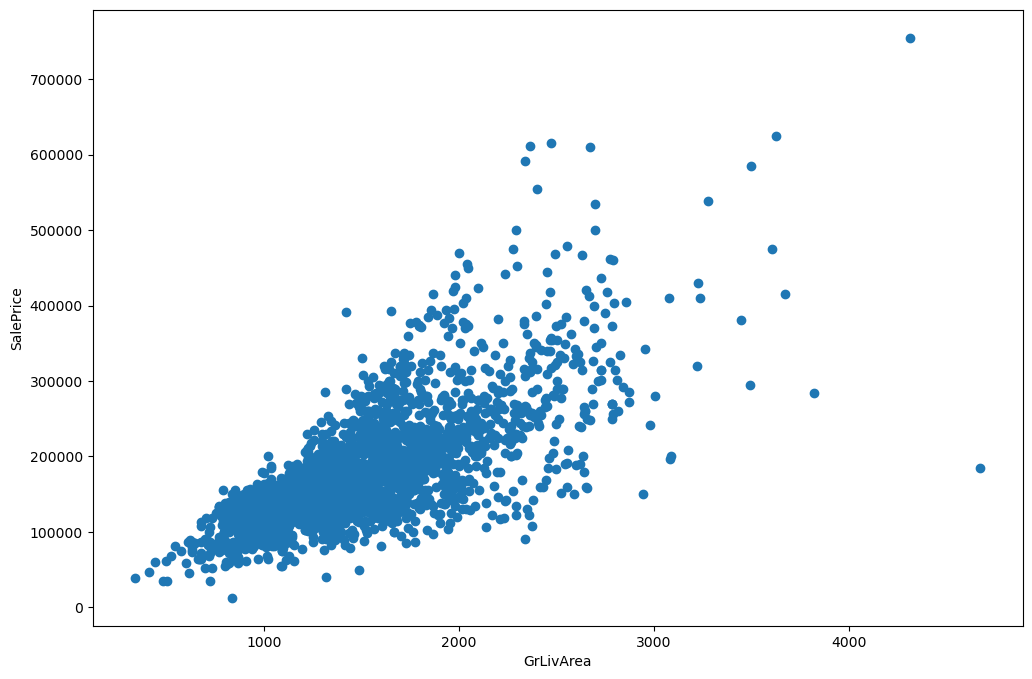

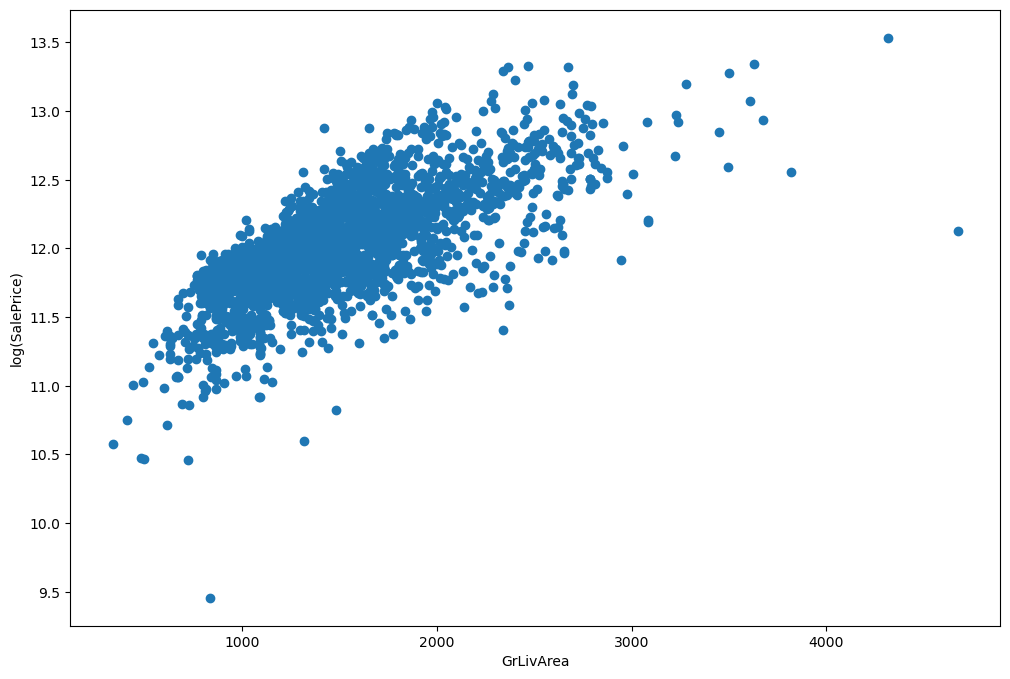

In [81]:
# Plot GrLivArea vs SalePrice
plt.figure(figsize=(12, 8))
plt.scatter(ames_clean['GrLivArea'], ames_clean['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


# Plot GrLivArea vs. log(SalePrice)
plt.figure(figsize=(12, 8))
plt.scatter(ames_clean['GrLivArea'], np.log(ames_clean['SalePrice']))
plt.xlabel('GrLivArea')
plt.ylabel('log(SalePrice)')
plt.show()

In [82]:
# Find outliers with GrLivArea > 4000
ames_clean[ames_clean['GrLivArea'] > 4000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
310,908154205,4676,184750,60,RL,130.0,40094,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,10,2007,New,Partial
8,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal


In [83]:
# Remove outliers with GrLivArea > 4000
ames_clean = ames_clean[ames_clean['GrLivArea'] < 4000]

In [84]:
# Find outliers with log(SalePrice) < 10
ames_clean[np.log(ames_clean['SalePrice']) < 10]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
428,902207130,832,12789,30,RM,68.0,9656,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml


In [85]:
# Remove ouliers with log(SalePrice) < 10
ames_clean = ames_clean[np.log(ames_clean['SalePrice']) > 10]

In [86]:
# Check shape
ames_clean.shape

(2576, 81)

## Missing Values

In [87]:
# Check for missing values
missing_values = ames_clean.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      462
Alley           2408
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2567
Fence           2051
MiscFeature     2479
dtype: int64


In [89]:
# Calculate missing values as % of all values
missing_values_percent = missing_values[missing_values > 0] / ames_clean.shape[0]

# Sort values in descending order
missing_values_percent.sort_values(ascending=False)

PoolQC          0.996506
MiscFeature     0.962345
Alley           0.934783
Fence           0.796196
FireplaceQu     0.481755
LotFrontage     0.179348
GarageCond      0.050078
GarageQual      0.050078
GarageFinish    0.050078
GarageYrBlt     0.050078
GarageType      0.049301
BsmtExposure    0.027562
BsmtFinType2    0.027174
BsmtFinType1    0.026786
BsmtQual        0.026786
BsmtCond        0.026786
MasVnrArea      0.005435
MasVnrType      0.005435
BsmtHalfBath    0.000776
BsmtFullBath    0.000776
TotalBsmtSF     0.000388
BsmtUnfSF       0.000388
GarageCars      0.000388
GarageArea      0.000388
BsmtFinSF2      0.000388
BsmtFinSF1      0.000388
Electrical      0.000388
dtype: float64

In [90]:
# Drop columns with high % of missing values
ames_clean.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

# Show columns with missing values
ames_clean.columns[ames_clean.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'],
      dtype='object')

In [91]:
# Replace missing values for numerics and ordinal categoricals
ames_clean['LotFrontage'].fillna(0, inplace=True)
ames_clean['MasVnrArea'].fillna(0, inplace=True)
ames_clean['BsmtFinSF1'].fillna(0, inplace=True)
ames_clean['BsmtFinSF2'].fillna(0, inplace=True)
ames_clean['BsmtUnfSF'].fillna(0, inplace=True)
ames_clean['TotalBsmtSF'].fillna(0, inplace=True)
ames_clean['BsmtFullBath'].fillna(0, inplace=True)
ames_clean['BsmtHalfBath'].fillna(0, inplace=True)
ames_clean['GarageYrBlt'].fillna(0, inplace=True) # 0 means no garage
ames_clean['GarageCars'].fillna(0, inplace=True)
ames_clean['GarageArea'].fillna(0, inplace=True)

# Replace missing values for nominative categoricals
ames_clean['MasVnrType'].fillna('None', inplace=True)
ames_clean['BsmtQual'].fillna('None', inplace=True)
ames_clean['BsmtCond'].fillna('None', inplace=True)
ames_clean['BsmtExposure'].fillna('None', inplace=True)
ames_clean['BsmtFinType1'].fillna('None', inplace=True)
ames_clean['BsmtFinType2'].fillna('None', inplace=True)
ames_clean['Electrical'].fillna('None', inplace=True)
ames_clean['FireplaceQu'].fillna('None', inplace=True)
ames_clean['GarageType'].fillna('None', inplace=True)
ames_clean['GarageFinish'].fillna('None', inplace=True)
ames_clean['GarageQual'].fillna('None', inplace=True)
ames_clean['GarageCond'].fillna('None', inplace=True)

# Check for missing values
print(ames_clean.isnull().sum().any())

False


## Imbalanced Features

In [92]:
# Categorize columns by data type
numeric_cols = ames_raw.select_dtypes(include=[np.number]).columns
categorical_cols = ames_raw.select_dtypes(include=[object]).columns

# Check by summing number of numeric and categorical columns
print(len(numeric_cols) + len(categorical_cols) == ames_raw.shape[1])

True


In [93]:
# Get count of values for each categorical column
for col in categorical_cols:
    print(col)
    print(ames_raw[col].value_counts())
    print()
    

MSZoning
RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Street
Pave    2570
Grvl      10
Name: Street, dtype: int64

Alley
Grvl    105
Pave     63
Name: Alley, dtype: int64

LotShape
Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64

LandContour
Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64

Utilities
AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

LotConfig
Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64

LandSlope
Gtl    2458
Mod     109
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42

In [94]:
# Drop columns that are highly imbalanced
ames_clean.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'], axis=1, inplace=True)

## Drop Unnecessary Columns, Reset Columns

In [95]:
# Drop the PID column
ames_clean.drop('PID', axis=1, inplace=True)
ames_clean.shape

(2576, 71)

In [96]:
# Reset the index
ames_clean.reset_index(drop=True, inplace=True)

In [97]:
# Categorize columns by data type
numeric_cols = ames_raw.select_dtypes(include=[np.number]).columns
categorical_cols = ames_raw.select_dtypes(include=[object]).columns

# Check by summing number of numeric and categorical columns
print(len(numeric_cols) + len(categorical_cols) == ames_raw.shape[1])

True


In [98]:
# Show dataframe
ames_clean.head(10)

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,856,126000,30,RL,0.0,7890,Reg,Lvl,Corner,Gtl,...,0,0,0,166,0,0,3,2010,WD,Normal
1,1049,139500,120,RL,42.0,4235,Reg,Lvl,Inside,Gtl,...,105,0,0,0,0,0,2,2009,WD,Normal
2,1001,124900,30,C (all),60.0,6060,Reg,Lvl,Inside,Gtl,...,0,42,86,0,0,0,11,2007,WD,Normal
3,1039,114000,70,RL,80.0,8146,Reg,Lvl,Corner,Gtl,...,0,168,0,111,0,0,5,2009,WD,Normal
4,1665,227000,60,RL,70.0,8400,Reg,Lvl,Inside,Gtl,...,45,0,0,0,0,0,11,2009,WD,Normal
5,1922,198500,85,RL,64.0,7301,Reg,Lvl,Corner,Gtl,...,0,177,0,0,0,0,7,2009,ConLD,Normal
6,936,93000,20,RM,60.0,6000,Reg,Bnk,Inside,Mod,...,32,112,0,0,0,0,2,2009,WD,Normal
7,1246,187687,20,RL,53.0,3710,Reg,Lvl,Inside,Gtl,...,24,0,0,0,0,0,3,2008,New,Partial
8,889,137500,20,RL,74.0,12395,Reg,Lvl,Corner,Gtl,...,0,0,0,0,0,0,4,2008,WD,Normal
9,1072,140000,180,RM,35.0,3675,Reg,Lvl,Inside,Gtl,...,44,0,0,0,0,0,5,2007,WD,Normal


## Save Clean Data

In [100]:
print(ames_clean.columns)

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       

In [101]:
# Check cleaned dataframe
print(ames_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2576 non-null   int64  
 1   SalePrice      2576 non-null   int64  
 2   MSSubClass     2576 non-null   int64  
 3   MSZoning       2576 non-null   object 
 4   LotFrontage    2576 non-null   float64
 5   LotArea        2576 non-null   int64  
 6   LotShape       2576 non-null   object 
 7   LandContour    2576 non-null   object 
 8   LotConfig      2576 non-null   object 
 9   LandSlope      2576 non-null   object 
 10  Neighborhood   2576 non-null   object 
 11  Condition1     2576 non-null   object 
 12  BldgType       2576 non-null   object 
 13  HouseStyle     2576 non-null   object 
 14  OverallQual    2576 non-null   int64  
 15  OverallCond    2576 non-null   int64  
 16  YearBuilt      2576 non-null   int64  
 17  YearRemodAdd   2576 non-null   int64  
 18  RoofStyl

In [102]:
# Output files
ames_clean.to_csv('data/Ames_Housing_Price_Data_clean.csv', index=False)